# Big Data y Machine learning (UBA) 2025
## Tutorial 11 - Clasificacion 1: Logit & Vecinos Cercanos(KNN)

**Objetivo:** entender la "diferencia" entre clasificación y regresión. Utilizar Bayes, logit y KNN. 

Veremos:
- Clasificación
- Medidas de precisión
- KNN


In [2]:
import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier


#### Nueva situación: '*y*' es una variable cualitativa. ¿Qué hacer? 

- ¿Por qué en el caso de '*y*' cualitativa la regresión linear no es una opción apropiada?

1. Puede no haber una forma de transformar una variable cualitativa con más de 2 niveles en una variable cuantitaiva que nos 'sirva' para una regresión lineal. Puede que '*y*' no tenga un orden. Por ejemplo, si la 'y' hace referencia a enfermedades. ¿Cómo asignarles un valor? Implicaría asumir un orden y también que la diferencia entre las enfermedades es equivalente...

2. En el caso binario (2 niveles) podemos transformar la variable a una variable numérica. Por ejemplo: $y=1$ pobre e $y=0$ no pobre. Sin embargo, con una regresión  lineal podría ocurrir que generemos predicciones fuera del intervalo $[0, 1]$ y por ende no podremos interpretarlo como probabilidades...

Entonces...
#### Vamos a clasificar 'y' (variable cualitativa) en base a 'x'

- ¿Estamos ante un caso de aprendizaje supervisado o no supervisado? 

Vamos a trabajar con bases donde tenemos el output esperado. Por lo tanto, nuestros modelos serán casos de aprendizaje supervisado.
     
- ¿Qué es el clasificador de Bayes? 

Clasificar según el estado más probable minimiza el riesgo esperado. Por ej: si la probabilidad de que una persona me pague un credito es mayor que 0.5, predigo que pagará el credito. 

#### Modelos en esta tutorial:
    
1. Regresión logística 
2. KNN

Vamos a construir un clasificador con los datos de training. Queremos que funcione bien no solo en el conjunto de entrenamiento sino también en el conjunto de test (datos *nuevos*).

#### REGRESIÓN LOGÍSTICA CON SCIKIT-LEARN

Algoritmo de clasificación que se usa para predecir la probabilidad de una variable dependiente categórica. El modelo logit predice $P(Y=1)$ como una función de $X$. Se modela la probabilidad de una forma tal que los outputs serán valores entre 0 y 1 para cualquier valor de $X$.


Ahora utilizaremos la función [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Boolean que decide si calcular el intercepto (True) o considerarlo igual a cero (False). Por default es True.
- **penalty**: Se determina se usar algún tipo de regularización (lo veremos mas adelante en el curso). Posibles valores: ‘l1’, ‘l2’, ‘elasticnet’ y 'None' (usaremos esta opción por ahora). El valor por defecto es default es ‘l2’, es decir que se aplica regularización.


In [6]:
# Creamos un vector de x e y para fines del ejemplo.
np.random.seed(25)
X = np.random.normal(size=5000)
print(X)

# Recordatorio: para la regresión lineal creamos un vector aleatorio así:
y_int = 2 + 3*X + np.random.rand(500, 1)

# Ahora lo crearemos de la siguiente forma para que tenga más sentido usar una regresión logística
y = (X > 0).astype(float) # si no pusiera astype sería un array de True y False

# Alteramos los valores de X y sumamos variación con el "error"
X[X > 0] *= 25
X += .5 * np.random.normal(size=5000)
X = X.reshape((-1, 1)) # para tenerlo como columna
print(X)



[ 0.22827309  1.0268903  -0.83958485 ...  0.06643769  0.00432531
 -0.01252539]
[[ 6.41734493]
 [25.57694792]
 [-1.83584271]
 ...
 [ 1.74592531]
 [-0.37259427]
 [ 0.38327292]]


In [8]:
X.shape

(5000, 1)

Text(0, 0.5, 'Y')

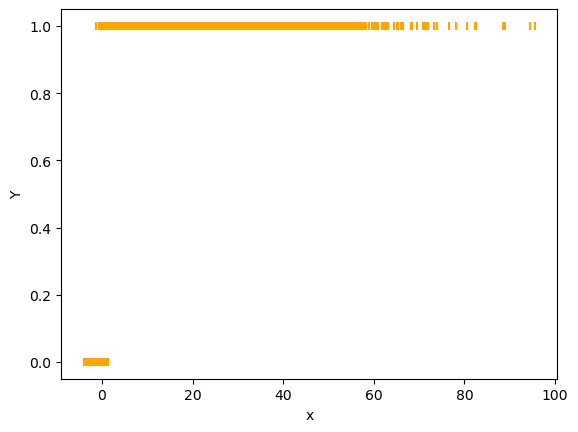

In [10]:
# Graficamos para ver si nos quedó un vector que 1s y 0s
plt.scatter(X, y, color='orange', zorder=20, marker="|")
plt.xlabel('x')
plt.ylabel('Y')

#### Estimación de Regresión logistica

[[3.27792584]]
[-2.89865634]


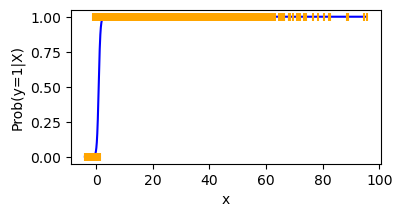

In [12]:
# Ajustamos el clasificador con el método fit() 
log_reg = LogisticRegression(penalty=None).fit(X, y)

# Estimacion de los coeficientes
print(log_reg.coef_)
print(log_reg.intercept_)

# Predicciones (probabilidad) (p sobrerito)
y_pred_score = log_reg.predict_proba(X)[:,1]   

# Gráfico de resultados
plt.figure(figsize=(4,2))

# Ordenamos los valores de X
X_sorted=np.sort(X, axis=0).flatten()
# Predicciones ordenadas (probabilidad)
y_pred_score_sorted = log_reg.predict_proba(X_sorted.reshape(-1,1))[:,1]   

plt.plot(X_sorted, y_pred_score_sorted, color='blue', zorder=10)
plt.scatter(X, y, color='orange', zorder=20, marker="|")
plt.xlabel('x')
plt.ylabel('Prob(y=1|X)')
plt.show()


In [ ]:
print(y_pred_score_sorted)

*Ejercicio*: Probar con mejorar la visualización de los graficos

Predicción de $\hat{Y}=1$ o $\hat{Y}=0$ usando el modelo estimado de regresión logística 

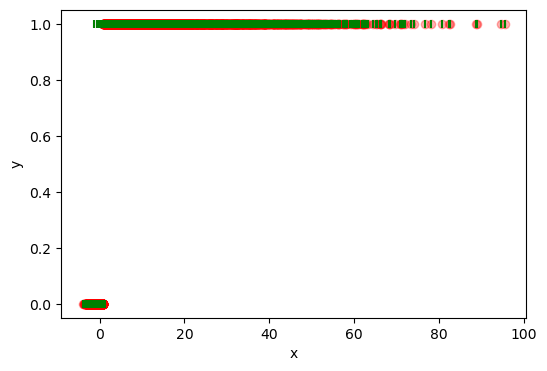

In [14]:
# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred = np.where(y_pred_score > 0.5, 1, y_pred_score)
y_pred = np.where(y_pred_score <= 0.5, 0, y_pred)

# Con este grafico visualizamos 'y' observado e 'y' predicho
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred, color='red', alpha=0.3, zorder=20)
plt.scatter(X, y, color='green', zorder=20, marker="|")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

col_0   0.0   1.0
row_0            
0.0    2558     0
1.0       0  2442


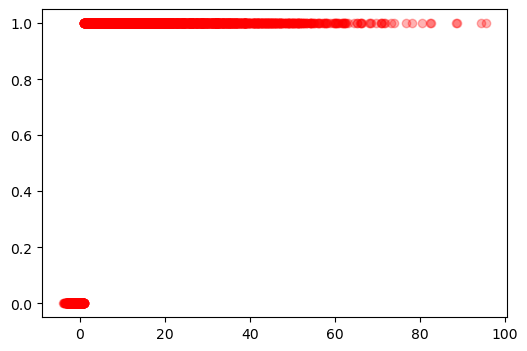

In [16]:
# Equivalente a lo anterior es usar predict() (clasifica en 0s y 1s)
y_pred_2 = log_reg.predict(X)
print(pd.crosstab(index=y_pred, columns=y_pred_2)) #tabla para chequear que la prediccion es igual

# Y graficamos los resultados
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred_2, color='red', alpha=0.3, zorder=20)
plt.show()

#### REGRESIÓN LOGÍSTICA CON STATSMODELS

In [18]:
# Podemos repetirlo con statsmodels
# Primero agregamos la columna de 1s y hacemos el ajuste
X_sm = sm.add_constant(X) 
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary2()) 
#También podríamos vn: print(result.summary2().as_latex())


Optimization terminated successfully.
         Current function value: 0.057073
         Iterations 13
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: y                Pseudo R-squared: 0.918   
Date:               2025-05-06 17:49 AIC:              574.7331
No. Observations:   5000             BIC:              587.7675
Df Model:           1                Log-Likelihood:   -285.37 
Df Residuals:       4998             LL-Null:          -3465.7 
Converged:          1.0000           LLR p-value:      0.0000  
No. Iterations:     13.0000          Scale:            1.0000  
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const      -2.8932    0.1374  -21.0538  0.0000  -3.1625  -2.6238
x1          3.2734    0.1966   16.6524  0.0000   2.8881   3.6587



In [ ]:
y_pred_score_sm = result.predict(X_sm)

# El método where requiere una condición como primer parámetro, 
# que cuando es True devuelve el segundo valor y cuando es False devuelve tercero. 
y_pred_sm = np.where(y_pred_score_sm > 0.5, 1, y_pred_score_sm)
y_pred_sm = np.where(y_pred_score_sm <= 0.5, 0, y_pred_sm)

print(pd.crosstab(index=y_pred, columns=y_pred_sm))

### Medidas de precisión 

Dependiendo la prioridad del problema seguramente vamos a querer usar diferentes métricas. Scikit learn tiene muchas métricas que pueden explorar en el módulo [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Sensitivity o Recall o True Positive Rate: TP rate = TP/P
- Specificity o True Negative Rate: 1 - FP rate = TN/N
- False Positive Rate o False Alarm Rate: FP rate = FP/N
- False Negative Rate: FN rate = FN/P
- Precision o Positive Predicted Value: TP/(TP+FP)
- Accuracy: (TP+TN)/(P+N)

Nota: Cuidado con las traducciones! "Accuracy" lo pueden encontrar traducido como "precisión" y eso puede generar confusión con la medida "precision" (o positive predicted value). Mi sugerencia es traducir "accuracy" como "exactitud".


[Matriz de confusión](https://www.unite.ai/what-is-a-confusion-matrix/)
<center>
<img src="https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png" width="1000">

</center>

In [20]:
matriz_confusion = confusion_matrix(y, y_pred)

print('Confusion Matrix:')
print(matriz_confusion) 
print('Accuracy Score:', accuracy_score(y, y_pred))

# Nota importante: en Python la matriz de confusión tiene:
# en las filas los valores ciertos
# y en las columnas los valores predichos

Confusion Matrix:
[[2482   14]
 [  76 2428]]
Accuracy Score: 0.982


La matriz de confusión de sklearn pone en las filas las Y reales y las columnas las Y predichas. Muestra así los valores:

                               predicción
                         real   tn fp
                                fn tp

In [22]:
# Para los casos donde la predición (la y) es binaria podemos usar lo siguiente:
tn, fp , fn, tp = confusion_matrix(y, y_pred).ravel()   # Ravel transforma la matriz en un 1D array
# equivalente a: [tn, fp] , [fn, tp] = confusion_matrix(y, y_pred_2)

print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Verdadero 0:  2482
Falso 1:  14
Falso 0:  76
Verdadero 1:  2428


In [24]:
confusion_matrix(y, y_pred).ravel()

array([2482,   14,   76, 2428])

In [26]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y, y_pred)
print('Recall: %f' % recall)

Accuracy: 0.982000
Recall: 0.969649


#### Repitamos el ejercicio usando el enfoque de validación
Vamos a partir la base en entrenamiento (train) y testeo (test) para evaluar nuestra predicción afuera de la muestra.

In [28]:
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear 
# el modelo obtenido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)


In [30]:
# Veamos la dimension de los vectores creados
print(X_train.shape)
print(y_train.shape)

print(y_test.shape)
print(X_test.shape)

(3500, 1)
(3500,)
(1500,)
(1500, 1)


In [32]:
# Estimo:

# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression(penalty=None).fit(X_train, y_train)

# Predecimos probabilidad p sombrero, 'y' sobrero con la muestra de entrenamiento
y_train_pred_score = log_reg.predict_proba(X_train)[:,1]
y_train_pred = log_reg.predict(X_train)

# con la muestra de testeo
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred = log_reg.predict(X_test)


Veamos los resultados *adentro de la muestra*

In [34]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy Test: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y_train, y_train_pred)
print('Recall Test: %f' % recall)

Accuracy Test: 0.981143
Recall Test: 0.968586


Veamos los resultados *afuera de la muestra*

In [36]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy Test: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y_test, y_test_pred)
print('Recall Test: %f' % recall)

Accuracy Test: 0.984000
Recall Test: 0.971975


**Pregunta**: Cómo es la performance afuera vs adentro de la muestra? Por qué es distinto?

### Vecinos Cercanos (k-nearest neighbors, KNN)
[KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): Clasificador de vecinos más cercanos

A continuación veremos un ejemplo de clasificación de las flores en la base de datos iris nuevamente y probaremos ajustando el parámetro k (cantidad de vecinos) para obtener el modelo con mayor precisión

Fuente: [MachineLearning — KNN using scikit-learn](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75)

#### Repaso del dataset de flores iris 
Esta base de datos la vimos en la tutorial de Cluster (y es un ejemplo muy usado para aprender las funciones de sklearn)

[The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


In [38]:
iris = datasets.load_iris()
#print(type(iris))

In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
# Separamos respuesta 'y' de los predictores X
X = iris.data
y = iris.target
print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [44]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
# Separamos la muestra en datos de entrenamiento y de validación 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=4) 

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #vemos lo tamaños de cada subconjunto

(105, 4) (45, 4) (105,) (45,)


In [50]:
# Vamos a probar con distintos tamaños de k (cantidad de vecinos)
k_range = range(1,10)
scores = {}      # Para guardar la accuracy en un diccionario
scores_list = [] # Para guardar la accuracy en una lista
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        scores[k] = accuracy_score(y_test, y_pred_knn)
        scores_list.append(accuracy_score(y_test, y_pred_knn))

In [52]:
# Observemos el diccionario con las métricas
scores

{1: 0.9555555555555556,
 2: 0.9555555555555556,
 3: 0.9777777777777777,
 4: 0.9777777777777777,
 5: 0.9777777777777777,
 6: 0.9777777777777777,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777}

Text(0, 0.5, 'Testing Accuracy')

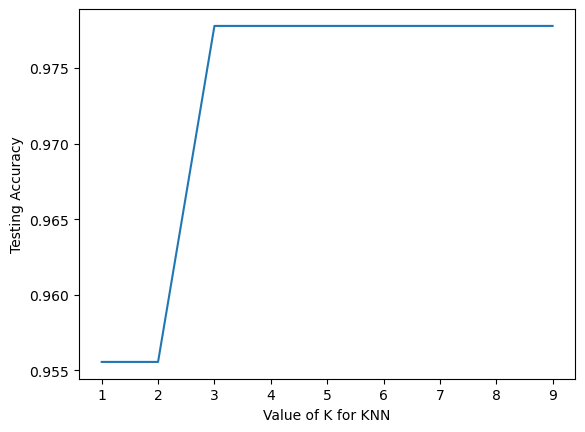

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

# Graficamos la precisión en base a la cantidad de vecinos
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Los valores de K entre 3 y 10 tienen la misma precisión, que es 97,77, por lo que podemos usar cualquier valor de esos. Elegiremos K = 3 como nuestro modelo final

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [58]:
y_test_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("La exactitud del modelo es: %.3f" %accuracy_knn)  

# Matriz de confusion
print(pd.crosstab(index=y_test, columns=y_test_pred_knn))

La exactitud del modelo es: 0.978
col_0   0  1   2
row_0           
0      21  0   0
1       0  9   1
2       0  0  14
